In [1]:
pwd


'C:\\Users\\DELL'

In [18]:
import pandas as pd
data=pd.read_csv("house_data.csv")
data

,build_year,lat,living_area,long,municipality_name,zipcode,num_rooms,object_type_name,price,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare
0,1990,47.009808,110.0,8.483789,Vitznau,6354,3.0,Wohnung,815000.0,0.400565,35.0,102.0,10,26.0,7,0,0,7,34
1,2017,46.872177,120.0,9.880183,Klosters-Serneus,7250,3.0,Wohnung,890000.0,0.008272,85.0,112.0,7,54.0,3,0,0,3,44
2,2010,46.519173,107.0,6.525882,Préverenges,1028,4.0,Wohnung,870000.0,0.140534,9.0,25.0,5,39.0,3,0,3,0,89
3,2018,47.521343,103.0,8.536971,Bülach,8180,3.0,Wohnung,829000.0,0.003954,14.0,18.0,2,2.0,3,0,3,0,4
4,2007,46.510216,95.0,9.852427,Celerina/Schlarigna,7505,3.0,Wohnung,865000.0,0.011116,101.0,198.0,9,45.0,3,0,3,3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22565,2017,47.263515,174.0,8.184093,Reinach (AG),5734,5.5,Einfamilienhaus,880000.0,0.000000,38.0,67.0,14,19.0,4,0,3,3,43
22566,2018,47.320694,146.0,8.152993,Dürrenäsch,5724,6.5,Einfamilienhaus,698000.0,0.000000,32.0,66.0,6,7.0,0,0,0,0,20
22567,1972,46.784409,65.0,9.537591,Churwalden,7075,3.0,Wohnung,450000.0,0.000459,76.0,115.0,6,45.0,0,0,0,0,35
22568,1977,46.220421,93.0,6.106879,Vernier,1220,4.0,Wohnung,820000.0,0.000472,5.0,15.0,4,40.0,3,0,0,3,229


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
data = pd.read_csv('house_data.csv')
print(data.head())

   build_year        lat  living_area      long    municipality_name  zipcode  \
0        1990  47.009808        110.0  8.483789              Vitznau     6354   
1        2017  46.872177        120.0  9.880183     Klosters-Serneus     7250   
2        2010  46.519173        107.0  6.525882          Préverenges     1028   
3        2018  47.521343        103.0  8.536971               Bülach     8180   
4        2007  46.510216         95.0  9.852427  Celerina/Schlarigna     7505   

   num_rooms object_type_name     price  water_percentage_1000  \
0        3.0          Wohnung  815000.0               0.400565   
1        3.0          Wohnung  890000.0               0.008272   
2        4.0          Wohnung  870000.0               0.140534   
3        3.0          Wohnung  829000.0               0.003954   
4        3.0          Wohnung  865000.0               0.011116   

   travel_time_private_transport  travel_time_public_transport  \
0                           35.0                  

In [21]:
print(data.isnull().sum())

build_year                                  0
lat                                         0
living_area                                 0
long                                        0
municipality_name                           0
zipcode                                     0
num_rooms                                   0
object_type_name                            0
price                                       0
water_percentage_1000                       0
travel_time_private_transport               0
travel_time_public_transport                0
number_of_buildings_in_hectare              0
number_of_apartments_in_hectare             0
number_of_workplaces_in_hectare             0
number_of_workplaces_sector_1_in_hectare    0
number_of_workplaces_sector_2_in_hectare    0
number_of_workplaces_sector_3_in_hectare    0
population_in_hectare                       0
dtype: int64


In [25]:
data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = data.corr()


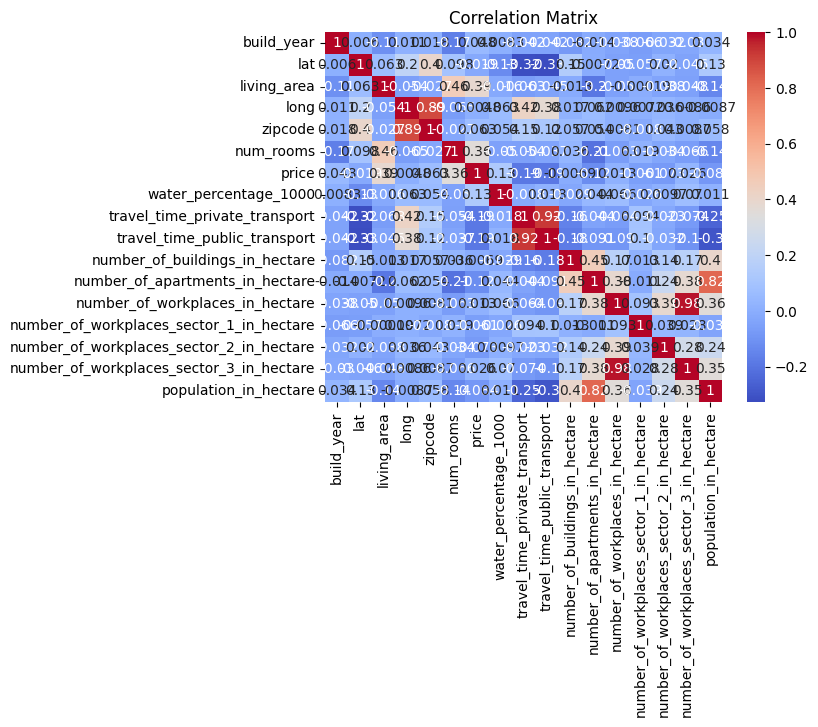

In [26]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Preprocessing: Selecting features and target variable
X = data[['water_percentage_1000',	'travel_time_private_transport'	,'travel_time_public_transport' ,'number_of_buildings_in_hectare',	'number_of_apartments_in_hectare',	'number_of_workplaces_in_hectare',	'number_of_workplaces_sector_1_in_hectare',	'number_of_workplaces_sector_2_in_hectare',	'number_of_workplaces_sector_3_in_hectare',	'population_in_hectare'
]]
y = data['price']


In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 266614495656.50986
R-squared: 0.08103190559065421


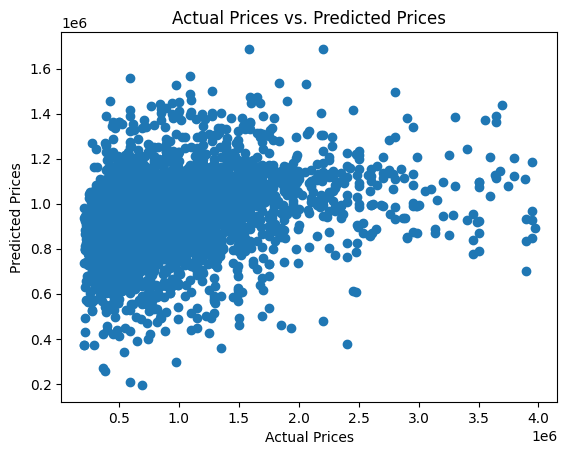

In [33]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


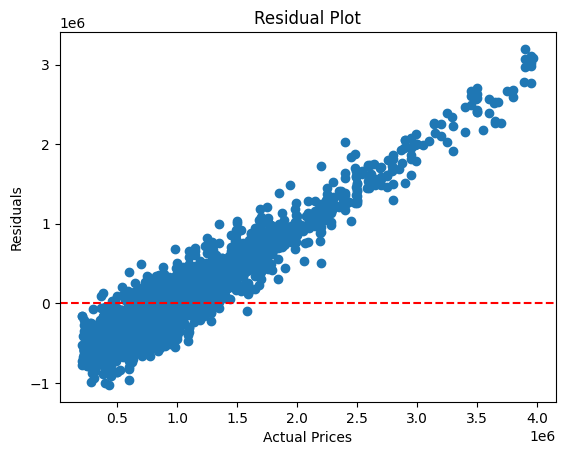

In [34]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [39]:
# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[0.23456, 56.0, 150, 40, 78, 10, 0, 0,7,34]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 893371.0199466537


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
